In [2]:
import mne
import os
import glob
import numpy as np
import pandas as pd
from scipy.io import savemat, loadmat
import matplotlib.pyplot as plt
import pickle


from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs

import sys
sys.path.append('../utils')
from pp_utils import *

In [3]:
#======================================================================================
#                        INITIALIZE DIRECTORIES
#======================================================================================
pp_dir = "/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/data_preprocessed" #where the preprocessed files are
subjects_to_process = ['01']
period = 'pre'

#======================================================================================
#                        PARAMETERS
#======================================================================================
with open('../utils/ch_names.pkl', 'rb') as file:
    ch_names_all = pickle.load(file)
ch_names_64 = ch_names_all[0:64]
ch_names_exg = ch_names_all[66:72]

In [4]:
#======================================================================================
#                        LOAD DATA
#======================================================================================
for folder in sorted(os.listdir(pp_dir)):
    if folder not in subjects_to_process:
        continue
    sub_pp_dir = os.path.join(pp_dir, folder)
    data_path = glob.glob(os.path.join(sub_pp_dir, f'eeg_motor_{period}_??.mat'))[0]

    subject_ID = data_path.split('.')[0][-2:]

    print('Opening', data_path.split('/')[-1])
    
    data = loadmat(data_path)
    eeg = data['trial_data']
    refs = data['trial_mastoids']
    events_sv = data['events']
    exg = data['trial_exg']

    """  already_processed = []
    already_processed.append(subject_ID)"""


    

Opening eeg_motor_pre_01.mat


In [5]:
#making raw object from .mat data

info_raw = mne.create_info(ch_names=ch_names_64, sfreq = 128, ch_types='eeg')
raw = mne.io.RawArray(eeg, info = info_raw)
raw.set_montage('biosemi64')


Creating RawArray with float64 data, n_channels=64, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   599.992 secs
Ready.


<RawArray | 64 x 76800 (600.0 s), ~37.6 MB, data loaded>

NOTE: plot_raw_psd() is a legacy function. New code should use Raw.compute_psd().plot().
Effective window size : 16.000 (s)


/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/mne/viz/utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


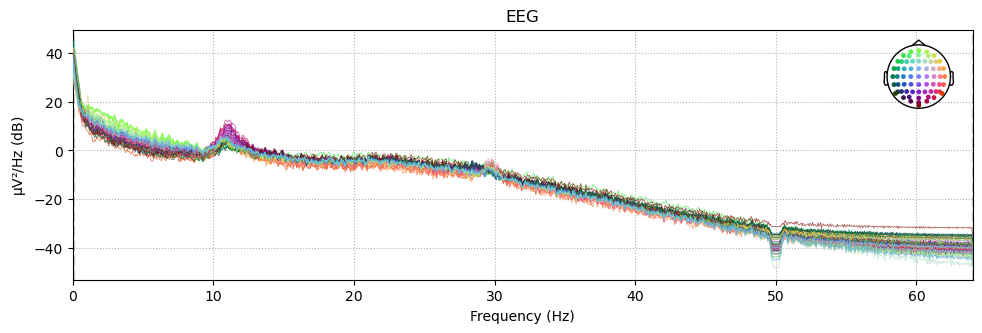

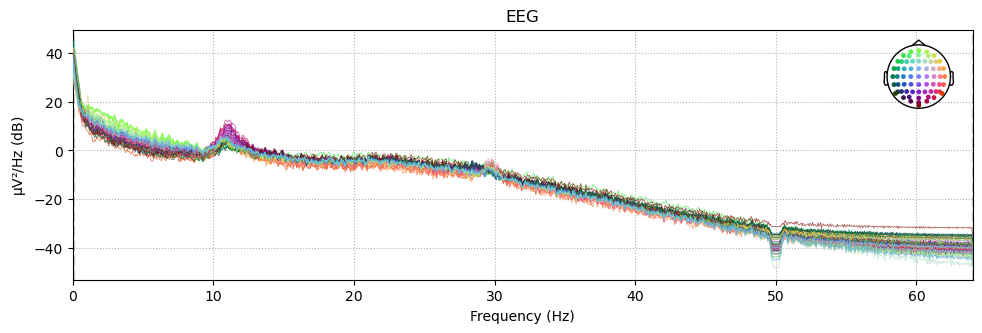

In [6]:
#check psd
mne.viz.plot_raw_psd(raw, fmin = 0, fmax = 64)

In [7]:

info_raw = mne.create_info(ch_names=ch_names_64, sfreq = 128, ch_types='eeg')
raw = mne.io.RawArray(eeg, info = info_raw)
raw.set_montage('biosemi64')


Creating RawArray with float64 data, n_channels=64, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   599.992 secs
Ready.


<RawArray | 64 x 76800 (600.0 s), ~37.6 MB, data loaded>

In [8]:
info_exg = mne.create_info(ch_names=ch_names_exg, sfreq=128, ch_types='eeg') #only works as eeg
raw_exg = mne.io.RawArray(exg, info = info_exg)


Creating RawArray with float64 data, n_channels=6, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   599.992 secs
Ready.


NOTE: plot_raw_psd() is a legacy function. New code should use Raw.compute_psd().plot().
Effective window size : 16.000 (s)


/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_79962/3212679727.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  mne.viz.plot_raw_psd(raw_exg, fmin = 0, fmax = 64)
/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/mne/viz/utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


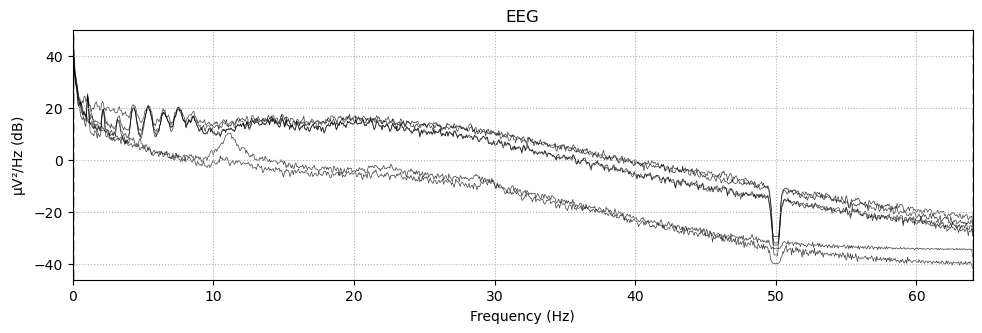

In [9]:
mne.viz.plot_raw_psd(raw_exg, fmin = 0, fmax = 64)

In [10]:
ica = ICA(max_iter="auto", random_state=97)
ica.fit(raw_exg)
ica

Fitting ICA to data using 6 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 6 components


/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_79962/185743078.py:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw_exg)


Fitting ICA took 0.1s.


Method,fastica
Fit,10 iterations on raw data (76800 samples)
ICA components,6
Available PCA components,6
Channel types,eeg
ICA components marked for exclusion,—


In [11]:
ica.plot_sources(raw_exg)

Creating RawArray with float64 data, n_channels=6, n_times=76800
    Range : 0 ... 76799 =      0.000 ...   599.992 secs
Ready.
Using qt as 2D backend.
Using pyopengl with version 3.1.6
